In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam as Adam
from tensorflow.keras.optimizers import SGD as SGD
from tensorflow.keras.optimizers import RMSprop as RMSprop
from tensorflow.keras.optimizers import Adagrad as Adagrad
from tensorflow.keras.optimizers import Adadelta as Adadelta
from tensorflow.keras.optimizers import Adamax as Adamax
from tensorflow.keras.optimizers import Nadam as Nadam
import shutil
import tensorflow_ranking as tfr
from tensorflow_ranking.python.keras.metrics import MeanAveragePrecisionMetric
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers
from sklearn import preprocessing

In [3]:
#check GPU availability and use it
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 701852068337779542
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10452200320
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12009672768400260364
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


2022-08-13 21:00:13.893635: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-13 21:00:13.893866: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-13 21:00:13.894366: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-13 21:00:13.954056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 21:00:13.955172: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 na

In [4]:
# input_data_path =r'C:/Users/conm/Desktop/Stenosis-Project/Stenosis detection/input'

train_path = '/home/lunet/conm/Desktop/Stenosis-Project/output/train/stenosis'

# train_path1 = r'C:\Users\conm\Desktop\Stenosis-Project\train_images'

test_path = '/home/lunet/conm/Desktop/Stenosis-Project/test_images'

val_path = '/home/lunet/conm/Desktop/Stenosis-Project/output/val/stenosis'

# train_path2 = r'C:\Users\conm\Desktop\Stenosis-Project\Dataset_Reduced\train\images'

In [5]:
train_labels_csv = pd.read_csv('train_labels.csv')

In [6]:
test_labels_csv = pd.read_csv('test_labels.csv')

In [7]:
val_labels_csv = pd.read_csv('val_labels.csv')

In [8]:
train_images = []
train_targets = []

val_images = []
val_targets = []

test_images = []
test_targets = []

In [9]:
for index, row in train_labels_csv.iterrows():
    (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row

    pic = cv2.imread(os.path.join(train_path,filename))
    pic = cv2.resize(pic, (400, 400))
    # pic_arr = keras.preprocessing.image.img_to_array(pic)

    train_images.append(pic)
    train_targets.append((xmin, ymin, xmax, ymax))

In [10]:
for index, row in val_labels_csv.iterrows():
    (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row

    pic = cv2.imread(os.path.join(val_path,filename))
    pic = cv2.resize(pic, (400, 400))
    # pic_arr = keras.preprocessing.image.img_to_array(pic)

    val_images.append(pic)
    val_targets.append((xmin, ymin, xmax, ymax))

In [11]:
for index, row in test_labels_csv.iterrows():
    (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row

    pic = cv2.imread(os.path.join(test_path,filename))
    pic = cv2.resize(pic, (400, 400))
    # pic_arr = keras.preprocessing.image.img_to_array(pic)

    test_images.append(pic)
    test_targets.append((xmin, ymin, xmax, ymax))

In [12]:
train_images = np.asarray(train_images)
train_targets = np.asarray(train_targets)

In [13]:
val_images = np.asarray(val_images)
val_targets = np.asarray(val_targets)

In [14]:
test_images = np.asarray(test_images)
test_targets = np.asarray(test_targets)

In [15]:
train_images[1]

array([[[249, 249, 249],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [229, 229, 229],
        [217, 217, 217]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [231, 231, 231],
        [231, 231, 231],
        [224, 224, 224]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [233, 233, 233],
        [231, 231, 231],
        [225, 225, 225]],

       ...,

       [[ 10,  10,  10],
        [ 11,  11,  11],
        [ 15,  15,  15],
        ...,
        [ 42,  42,  42],
        [ 47,  47,  47],
        [ 35,  35,  35]],

       [[ 13,  13,  13],
        [ 15,  15,  15],
        [ 11,  11,  11],
        ...,
        [ 34,  34,  34],
        [ 40,  40,  40],
        [ 42,  42,  42]],

       [[ 13,  13,  13],
        [ 13,  13,  13],
        [ 10,  10,  10],
        ...,
        [ 36,  36,  36],
        [ 38,  38,  38],
        [ 38,  38,  38]]

In [17]:
# Nomarlize the images of bigger size without kernel crash
# train_images /= 255
# val_images /= 255
test_images /= 255

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [45]:
# Normalize the targets
train_targets /= 256
val_targets /= 256
test_targets /= 256

In [29]:
# Normalize targets
# train_targets = train_targets / 256
# val_targets = val_targets / 256

# # Normalize images
# train_images = train_images / 255
# val_images = val_images / 255

# # Normalize test images
# test_images = test_images / 255
# test_targets = test_targets / 256

: 

: 

In [16]:
dataGenerator = ImageDataGenerator(rotation_range=0,
                                   zoom_range=0,
                                   width_shift_range=0,
                                   height_shift_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [17]:
# number of convolutional filters to use
filters = 64
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

num_classes = 4
input_shape = (400,400,3)

In [18]:
# Create a new model for object detection and transfer learning
# model = Sequential()
feature_layers = [
    Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2))
]
initializer = tf.keras.initializers.HeUniform()
classification_layers = [
    Flatten(),
    Dense(128, activation='relu', kernel_initializer=initializer),
    Dropout(0.25),
    Dense(4),
]
# Add custom metric for mean average precision to model.compile
# add learning rate


In [19]:
model = Sequential(feature_layers + classification_layers)

model.compile(loss='mse', optimizer='adam', metrics=[tfr.keras.metrics.MeanAveragePrecisionMetric()])
# model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        3

2022-08-13 21:02:54.365399: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-13 21:02:54.365529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 21:02:54.365823: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-08-13 21:02:54.365874: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-08-13 21:02:54.365895: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-08-13 21:02:54.365907: I tensorflow/stream_executor/plat

In [20]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [21]:
keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)


model.fit(dataGenerator.flow(train_images, train_targets, batch_size=32),
                            validation_data=(val_images, val_targets), 
                            epochs=150, callbacks=es, verbose=1)

2022-08-13 21:03:17.224443: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-13 21:03:17.252463: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz


Epoch 1/150
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-08-13 21:03:18.661408: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-08-13 21:03:18.958305: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


116/211 [===============>..............] - ETA: 5s - loss: 37021.5270 - mean_average_precision_metric: 1.0000

KeyboardInterrupt: 

: 

In [ ]:
for l in feature_layers:
    l.trainable = False

In [24]:
model_2 = Sequential(feature_layers + classification_layers)

In [25]:
model_2.compile(loss='mse', optimizer='adam', metrics=[tfr.keras.metrics.MeanAveragePrecisionMetric()])
model_2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 400, 400, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0

In [26]:
keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)


model_2.fit(dataGenerator.flow(train_images, train_targets, batch_size=64),
                            validation_data=(val_images, val_targets), 
                            epochs=150, callbacks=es, verbose=1)

Epoch 1/150
106/106 [==============================] - ETA: 0s - loss: 0.0180 - mean_average_precision_metric: 0.7966

2022-08-13 03:44:50.143813: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1440000000 exceeds 10% of free system memory.


106/106 [==============================] - 14s 126ms/step - loss: 0.0180 - mean_average_precision_metric: 0.7966 - val_loss: 0.0080 - val_mean_average_precision_metric: 0.7946
Epoch 2/150
106/106 [==============================] - 13s 120ms/step - loss: 0.0169 - mean_average_precision_metric: 0.8015 - val_loss: 0.0073 - val_mean_average_precision_metric: 0.7928
Epoch 3/150
106/106 [==============================] - 13s 120ms/step - loss: 0.0162 - mean_average_precision_metric: 0.7999 - val_loss: 0.0077 - val_mean_average_precision_metric: 0.7937
Epoch 4/150
106/106 [==============================] - 13s 120ms/step - loss: 0.0168 - mean_average_precision_metric: 0.8066 - val_loss: 0.0070 - val_mean_average_precision_metric: 0.7932
Epoch 5/150
106/106 [==============================] - 13s 120ms/step - loss: 0.0171 - mean_average_precision_metric: 0.8080 - val_loss: 0.0069 - val_mean_average_precision_metric: 0.7929
Epoch 6/150
106/106 [==============================] - 13s 120ms/step - 

27/27 [==============================] - 1s 29ms/step - loss: 0.0072 - mean_average_precision_metric: 0.7967


ValueError: 'grays' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

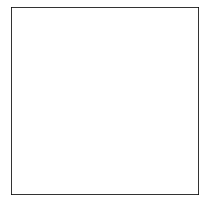

In [35]:
# Visualize the model prediction images
model.evaluate(test_images, test_targets, verbose=1)
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel('Stenosis')
plt.show()

In [226]:
initializer = tf.keras.initializers.HeUniform()
model = keras.Functional([

    # First Convolutional Block
    Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',input_shape=[224, 224, 3]),
    MaxPooling2D(),

    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    MaxPooling2D(),

    # Third Convolutional Block
    Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    MaxPooling2D(),

    # Classifier Head
    Flatten(),
    Dense(256, activation='relu', kernel_initializer=initializer),
    Dropout(0.5),
])

In [227]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [229]:
pretrained_model = tf.keras.applications.ResNet101(
        weights='imagenet',
        include_top=False ,
        input_shape=(224, 224, 3)
    )

pretrained_model.trainable = False

model.load_weights('yolov4.h5')
# model = tf.keras.Sequential([

#         pretrained_model,
#         tf.keras.layers.GlobalAveragePooling2D(),
#     ])

AttributeError: 'Sequential' object has no attribute 'load_model'

In [224]:
model.compile(loss='mse', optimizer='sgd', metrics=[tfr.keras.metrics.MeanAveragePrecisionMetric()])

In [225]:
keras.backend.clear_session()
np.random.seed(15)
tf.random.set_seed(15)


model.fit(dataGenerator.flow(train_images, train_targets, batch_size=32),
                            validation_data=(val_images, val_targets), 
                            epochs=150, callbacks=es, verbose=1)

Epoch 1/150


ValueError: in user code:

    /home/lunet/conm/.conda/envs/stenosispyv/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/lunet/conm/.conda/envs/stenosispyv/lib/python3.9/site-packages/tensorflow_ranking/python/keras/metrics.py:187 update_state  *
        per_list_metric_val, per_list_metric_weights = self._metric.compute(
    /home/lunet/conm/.conda/envs/stenosispyv/lib/python3.9/site-packages/tensorflow_ranking/python/metrics_impl.py:289 compute  *
        labels, predictions, weights, mask = self._prepare_and_validate_params(
    /home/lunet/conm/.conda/envs/stenosispyv/lib/python3.9/site-packages/tensorflow_ranking/python/metrics_impl.py:254 _prepare_and_validate_params  *
        predictions.get_shape().assert_is_compatible_with(
    /home/lunet/conm/.conda/envs/stenosispyv/lib/python3.9/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with  **
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 76, 76, 255) and (None, None) are incompatible
